In [18]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patheffects as PathEffects
import pandas as pd
sys.path.append('../')
from hamiltonian import *
from parameters import *

old_settings = np.seterr(divide='ignore', invalid='ignore') # Necessary to suppress warnings for low T

In [19]:
# Find magnitude of B-field needed for qubit frequency at given B-field angle
i_defect = 0 # model SiV
H, _, p = create_hamiltonian()

alpha = np.linspace(0, 100, 200)
B = .1*T_to_GHz
theta = np.linspace(0, 90, 200)*np.pi/180
alphaH, thetaH, _ = tensor_repeat(alpha, theta, np.zeros((4,4)))

BHx = B*np.sin(thetaH)
BHz = B*np.cos(thetaH)

# Calcuate four-level paramaters
Hgiv = H(BHx, 0, BHz, qs[i_defect], Ls[i_defect], alphaH, 0)
E, U = np.linalg.eigh(Hgiv)
E_Q, E_orb, lambda_eff = diagonalised_hamiltonian_parameters( E )

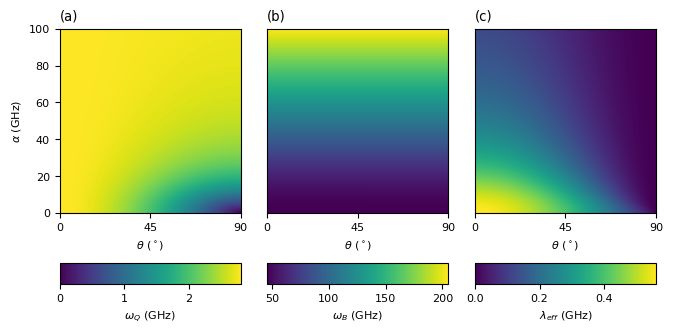

In [21]:
# Plot result
plt.rcParams.update({'font.size': 8})
fig = plt.figure(figsize=(2*3.38583, 3.38583))
gs = plt.GridSpec(ncols=3, nrows=2, height_ratios=[0.9, 0.1], hspace=1)

# Plot EQ
plt.subplot(gs[0,0])

im = plt.imshow(E_Q, aspect='auto', extent=[0, 90, 0, alpha[-1]], origin='lower' )

plt.xlabel(r'$\theta$ $(^\circ)$')
plt.xticks([0,45,90])
plt.ylabel(r'$\alpha$ (GHz)')
plt.title('(a)', loc='left')

cax = plt.subplot(gs[1,0])
plt.colorbar(im, cax=cax, orientation='horizontal', label=r'$\omega_Q$ (GHz)')
# plt.xticks([1e1, 1e3, 1e5])




# Plot EQ
plt.subplot(gs[0,1])

im = plt.imshow(E_orb, aspect='auto', extent=[0, 90, 0, alpha[-1]], origin='lower' )

plt.xlabel(r'$\theta$ $(^\circ)$')
plt.xticks([0,45,90])
plt.yticks([])
plt.title('(b)', loc='left')

cax = plt.subplot(gs[1,1])
plt.colorbar(im, cax=cax, orientation='horizontal', label=r'$\omega_B$ (GHz)')
# plt.xticks([1e1, 1e3, 1e5])



# Plot lambda_efff
plt.subplot(gs[0,2])

im = plt.imshow(lambda_eff, aspect='auto', extent=[0, 90, 0, alpha[-1]], origin='lower' )

plt.xlabel(r'$\theta$ $(^\circ)$')
plt.xticks([0,45,90])
plt.yticks([])
plt.title('(c)', loc='left')

cax = plt.subplot(gs[1,2])
plt.colorbar(im, cax=cax, orientation='horizontal', label=r'$\lambda_{eff}$ (GHz)')
# plt.xticks([1e1, 1e3, 1e5])



gs.tight_layout(fig)
plt.savefig("Fig5_appendix.pdf")

plt.show()